In [153]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
from mnist import MNIST

In [140]:
mndata = MNIST('/home/carlosg/Carlos/ML_repo/MNIST pytorch classifier')

train_images, train_labels = mndata.load_training()
# or
test_images, test_labels = mndata.load_testing()
BS = 128

train_images = np.array(train_images).reshape(-1, 1,28,28)
train_labels = np.array(train_labels)
test_images = np.array(test_images).reshape(-1, 1,28,28)
test_labels = np.array(test_labels)
# 
# N of variables to be removed to fit batch size
n_train_del = train_images.shape[0]%BS
train_i_del = np.random.choice(train_images.shape[0], size=n_train_del, replace=False)
n_test_del = test_images.shape[0]%BS
test_i_del = np.random.choice(test_images.shape[0], size=n_test_del, replace=False)
train_images = np.delete(train_images,obj=train_i_del,axis=0)
train_labels = np.delete(train_labels,obj=train_i_del,axis=0)
test_images = np.delete(test_images,obj=test_i_del,axis=0)
test_labels = np.delete(test_labels,obj=test_i_del,axis=0)
train_images = train_images.reshape(int(train_images.shape[0]/128),128,1,28,28)
test_images = test_images.reshape(int(test_images.shape[0]/128),128,1,28,28)
print(train_images.shape,test_images.shape)
print(train_labels.shape,test_labels.shape)

(468, 128, 1, 28, 28) (78, 128, 1, 28, 28)
(59904,) (9984,)


This is a 3


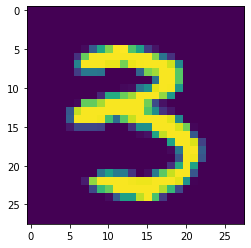

In [170]:
from matplotlib.pyplot import imshow 
hehe = math.ceil(np.random.rand(1)[0]*train_images.shape[0])
imshow(np.array(train_images[hehe][0][0]))
print(f'This is a {train_labels[hehe*BS]}')

In [145]:
# Model
class CNNXD(nn.Module):
    def __init__(self):
        super(CNNXD,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5)
        self.lin1 = nn.Linear(3*3*64,256)
        self.lin2 = nn.Linear(256,10)
    
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv3(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(x)
        x = x.view(-1,3*3*64 )
        x = self.lin1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.lin2(x)
        return x


In [127]:
train_images.shape

(468, 128, 1, 28, 28)

In [177]:
model = CNNXD()
# Train
loss_funct = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
model.train()
losses = []
for i,batch in enumerate(train_images):
    X = torch.Tensor(batch).float()
    Y = torch.Tensor(train_labels[i*BS:(i+1)*BS]).long()
    optimizer.zero_grad()
    out = model(X)
    loss = loss_funct(out, Y) #The loss funct. does not only input the predicted output but all of the output
    losses.append(loss.item())
    predictions = torch.stack([t.max(0).indices for t in out])
    accuracy = (predictions==Y).sum().item()/BS
    loss.backward()
    optimizer.step()
print(f'Loss: {loss} | Test accuracy:{accuracy}')    


Loss: 0.25391602516174316 | Test accuracy:0.9375


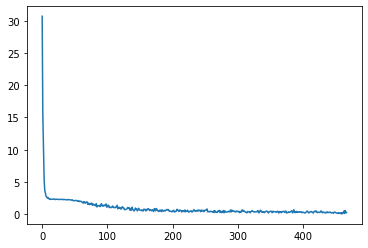

In [178]:
plt.plot(losses)

In [185]:
# Eval
model.eval()
X = torch.Tensor(test_images.reshape(test_images.shape[0]*test_images.shape[1],1,28,28)).float()
Y = torch.Tensor(test_labels).long()
out = model(X)
predictions = torch.stack([t.max(0).indices for t in out])
accuracy = (predictions==Y).sum().item()/Y.shape[0]
print(f'Eval. accuracy:{accuracy}')  

Eval. accuracy:0.9728565705128205


I think this is a 0


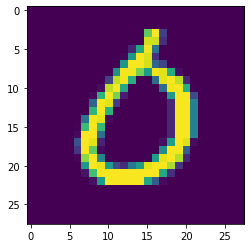

In [316]:
model.eval()
haha = math.ceil(np.random.rand(1)[0]*test_images.shape[0])
X = torch.Tensor(test_images[haha][0].reshape(1,1,28,28)).float()
out = model(X)
predictions = torch.stack([t.max(0).indices for t in out])
predictions.item()
imshow(np.array(test_images[haha][0][0]))
print(f'I think this is a {test_labels[haha*BS]}')